# **Latin Square Design**
The Latin Square Design provides a systematic control for another source
of variation, which is especially useful when there are two major sources of variation to consider.

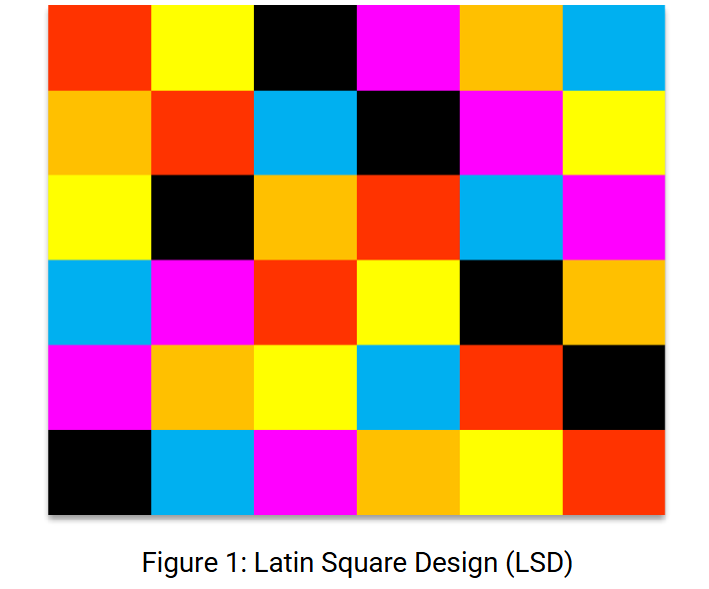





  

Figure 1 represents a `Latin Square Design`.

The speciality of this design is that the red box appears only once in each row and in each column. There is no repetition of this red box in the same column or row. Similarly, the other red boxes exhibit the same behaviour.

This arrangement is referred as a Latin Square Design. This is similar to a sudoku box. With the help of Latin Square, a person can analyse Latin Square Designs. The selection of Latin Square Designs is very important it depends upon the availability of the factors.

#Suppose we want to analyse the productivity of 5 kind on fertilizers, 5 kind of tillages, and 5 kind of seeds
The three factors are: `fertilizer (fertilizer 1:5), tillage (treatA:E), seed (A:E)`.

The numbers are the productivity in cwt / year(centum weight or quintal)

The data are organized in a latin square design, as follows:

In [ ]:
#               treatA  treatB  treatC  treatD  treatE
#   fertilizer1  "A42"   "C47"   "B55"   "D51"   "E44"
#   fertilizer2  "E45"   "B54"   "C52"   "A44"   "D50"
#   fertilizer3  "C41"   "A46"   "D57"   "E47"   "B48"
#   fertilizer4  "B56"   "D52"   "E49"   "C50"   "A43"
#   fertilizer5  "D47"   "E49"   "A45"   "B54"   "C46"

In [ ]:
#Now create a dataframe in R with these data:
fertil <- c(rep("fertil1",1), rep("fertil2",1), rep("fertil3",1), rep("fertil4",1), rep("fertil5",1))
treat <- c(rep("treatA",5), rep("treatB",5), rep("treatC",5), rep("treatD",5), rep("treatE",5))
seed <- c("A","E","C","B","D", "C","B","A","D","E", "B","C","D","E","A", "D","A","E","C","B", "E","D","B","A","C")
freq <- c(42,45,41,56,47, 47,54,46,52,49, 55,52,57,49,45, 51,44,47,50,54, 44,50,48,43,46)

In [ ]:
mydata <- data.frame(treat, fertil, seed, freq)
mydata

treat,fertil,seed,freq
<chr>,<chr>,<chr>,<dbl>
treatA,fertil1,A,42
treatA,fertil2,E,45
treatA,fertil3,C,41
treatA,fertil4,B,56
treatA,fertil5,D,47
treatB,fertil1,C,47
treatB,fertil2,B,54
treatB,fertil3,A,46
treatB,fertil4,D,52


**We can re-create the original table, using the matrix function:**

In [ ]:
matrix(mydata$seed, 5,5)

A,C,B,D,E
E,B,C,A,D
C,A,D,E,B
B,D,E,C,A
D,E,A,B,C


In [ ]:
matrix(mydata$freq, 5,5)

42,47,55,51,44
45,54,52,44,50
41,46,57,47,48
56,52,49,50,43
47,49,45,54,46


## **The ANOVA table**

In [ ]:
myfit <- lm(freq ~ fertil+treat+seed, mydata)
anova(myfit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
fertil,4,17.76,4.440000,0.7966507,0.549839444
treat,4,109.36,27.340000,4.9055024,0.014105168
seed,4,286.16,71.540000,12.8361244,0.000271007
Residuals,12,66.88,5.573333,NA,NA


Here, we can see that:
- The difference between group considering the fertilizer is not significant (p-value > 0.1)
- The difference between group considering the tillage is quite significant (p-value < 0.05)
- The difference between group considering the seed is very significant (p-value < 0.001)


In [ ]:
install.packages("agricolae")
library(agricolae)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘AlgDesign’




In [12]:
LSD.test(y = myfit,
         trt = "seed",
         DFerror = myfit$df.residual,
         MSerror = deviance(myfit)/myfit$df.residual,
         alpha = 0.05,
         group = TRUE,
         console = TRUE)


Study: myfit ~ "seed"

LSD t Test for freq 

Mean Square Error:  5.573333 

seed,  means and individual ( 95 %) CI

  freq      std r       se      LCL      UCL Min Max Q25 Q50 Q75
A 44.0 1.581139 5 1.055778 41.69966 46.30034  42  46  43  44  45
B 53.4 3.130495 5 1.055778 51.09966 55.70034  48  56  54  54  55
C 47.2 4.207137 5 1.055778 44.89966 49.50034  41  52  46  47  50
D 51.4 3.646917 5 1.055778 49.09966 53.70034  47  57  50  51  52
E 46.8 2.280351 5 1.055778 44.49966 49.10034  44  49  45  47  49

Alpha: 0.05 ; DF Error: 12
Critical Value of t: 2.178813 

least Significant Difference: 3.253175 

Treatments with the same letter are not significantly different.

  freq groups
B 53.4      a
D 51.4      a
C 47.2      b
E 46.8      b
A 44.0      b


The results shows that seed varieties B and D are statistically more productive than C,E and A